## Neural Networks


In [3]:
!pip install tensorflow

#### Load the 10,000 most commonly used phrases into the IMDB dataset in order to train and evaluate sentiment analysis.

In [235]:
from tensorflow.keras.datasets import imdb
(train_data_1, train_labels_1), (test_data_2, test_labels_2) = imdb.load_data(
    num_words=10000)

#### Creates the training data output's dimensions (or shape).

In [238]:
print(train_data_1,train_data_1.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

**Retrieves the initial label from the training set and prints it.**

In [241]:
train_labels_1[0]

1

**Returns the total number of labels present in the training dataset and prints it.**

In [244]:
len(train_labels_1)

25000

**Retrieves the test data's (test_labels) first label and prints it.**

In [36]:
test_labels_2[0]

0

**The biggest value (word index) among all the sequences in the test data is found and printed.**

In [39]:
max([max(sequence_647) for sequence_647 in test_data_2])

9999

**The reverse word index can be used to translate the word indices back to words and decode the first review from the training set.**

In [42]:
wordindex_647 = imdb.get_word_index()
reverse_wordindex_647 = dict(
    [(value, key) for (key, value) in wordindex_647.items()])
decoded_review = " ".join(
    [reverse_wordindex_647.get(i - 3, "?") for i in train_data_1[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Assigns a value of 1 to the index if the corresponding word occurs in the sequence after converting each integer sequence into a binary vector of a specified dimension.**

In [45]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    res = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            res[i, j] = 1.
    return res

**Applying the vectorize_sequences function, the train and test data sequences are converted into binary vector format.**

In [48]:
p_train = vectorize_sequences(train_data_1)
p_test = vectorize_sequences(test_data_2)

In [50]:
p_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [52]:
p_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

**Train and Test labels are converted to NumPy arrays and then cast to float32 type.**

In [55]:
q_train = np.asarray(train_labels_1).astype("float32")
q_test = np.asarray(test_labels_2).astype("float32")

**# Describes a TensorFlow Keras-based sequential neural network model with two hidden layers (16 units, ReLU activation) and one output layer (1 unit, sigmoid activation).**

In [58]:
from tensorflow import keras
from tensorflow.keras import layers

mod_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**# Incorporates the binary cross-entropy loss function, accuracy as the evaluation metric, and the RMSprop optimizer in the compilation process.**

In [61]:
mod_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**# Divides the training set of data into a validation set (the first 10,000 samples) and a partial training set using the remaining data.**

In [64]:
p_val = p_train[:10000]
partial_p_train = p_train[10000:]
q_val = q_train[:10000]
partial_q_train = q_train[10000:]

**## The model is scheduled to train over 20 iterations with a batch size of 256.**

In [67]:
history = mod_647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val, q_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.6884 - loss: 0.6003 - val_accuracy: 0.8288 - val_loss: 0.4256
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8906 - loss: 0.3483 - val_accuracy: 0.8832 - val_loss: 0.3153
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9176 - loss: 0.2555 - val_accuracy: 0.8888 - val_loss: 0.2846
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9355 - loss: 0.1991 - val_accuracy: 0.8814 - val_loss: 0.2911
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9442 - loss: 0.1708 - val_accuracy: 0.8847 - val_loss: 0.2847
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9575 - loss: 0.1412 - val_accuracy: 0.8854 - val_loss: 0.2817
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9661 - loss: 0.1198 - val_accuracy: 0.8807 - val_loss: 0.3053
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9691 - loss: 0.1060 - val_accuracy: 0.8838 - v

In [69]:
his_dict647 = history.history
his_dict647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Displaying the training loss against the validation loss**

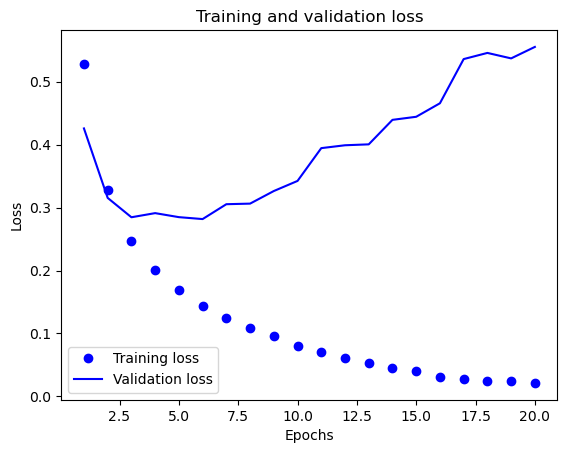

In [72]:
import matplotlib.pyplot as plot647
his_dict647 = history.history
l_values = his_dict647["loss"]
val_l_values = his_dict647["val_loss"]
epochs = range(1, len(l_values) + 1)
plot647.plot(epochs, l_values, "bo", label="Training loss")
plot647.plot(epochs, val_l_values, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

**#Plotting training accuracy vs validatition accuracy**

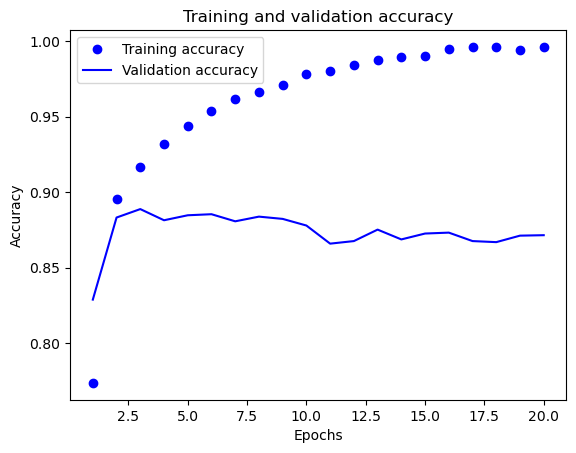

In [75]:
plot647.clf()
accuracy = his_dict647["accuracy"]
val_accuracy = his_dict647["val_accuracy"]
plot647.plot(epochs, accuracy, "bo", label="Training accuracy")
plot647.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Creates a sequential model with two hidden layers (16 units each, ReLU activation) and one output layer (1 unit, sigmoid activation). RMSprop optimizer and binary crossentropy loss are used to assemble the model, and it is trained for**

In [78]:
mod_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
mod_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
mod_647.fit(p_train, q_train, epochs=4, batch_size=512)
res = mod_647.evaluate(p_test, q_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7391 - loss: 0.5607
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9041 - loss: 0.2849
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9275 - loss: 0.2148
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9377 - loss: 0.1812
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8744 - loss: 0.3085


In [80]:
res

[0.30999985337257385, 0.8746399879455566]

In [82]:
mod_647.predict(p_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.14772719],
       [0.9993616 ],
       [0.5008595 ],
       ...,
       [0.09252791],
       [0.04264301],
       [0.4567442 ]], dtype=float32)

**# Builds a sequential model with one output layer (one unit, sigmoid activation) and one hidden layer (16 units, ReLU activation). It is then assembled using the RMSprop optimizer and binary crossentropy loss, the training data is divided into training and validation sets, and the model is trained for 20 epochs with a batch size of 512 while being validated on the validation set.**

In [85]:
mod_647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

mod_647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

p_val647 = p_train[:10000]
partial_p_train = p_train[10000:]

q_val647 = q_train[:10000]
partial_q_train = q_train[10000:]


his_layer647 = mod_647_layer.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val647, q_val647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.7290 - loss: 0.5708 - val_accuracy: 0.8643 - val_loss: 0.4001
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8935 - loss: 0.3474 - val_accuracy: 0.8722 - val_loss: 0.3393
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9173 - loss: 0.2693 - val_accuracy: 0.8768 - val_loss: 0.3134
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9303 - loss: 0.2258 - val_accuracy: 0.8795 - val_loss: 0.2971
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9412 - loss: 0.1928 - val_accuracy: 0.8741 - val_loss: 0.3079
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9487 - loss: 0.1727 - val_accuracy: 0.8891 - val_loss: 0.2743
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9558 - loss: 0.1512 - val_accuracy: 0.8858 - val_loss: 0.2841
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9592 - loss: 0.1388 - val_accuracy: 0.8858 - v

**Retrieve the model training history from history_layer647 and present the history dictionary's keys.**

In [88]:
his_dict647 = his_layer647.history
his_dict647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# The process involves importing matplotlib, retrieving loss values from the training history, defining the range of epochs, and plotting the training and validation loss graph over epochs along with labels and a legend.**

**Graphing the Accuracy of Training and Validation**

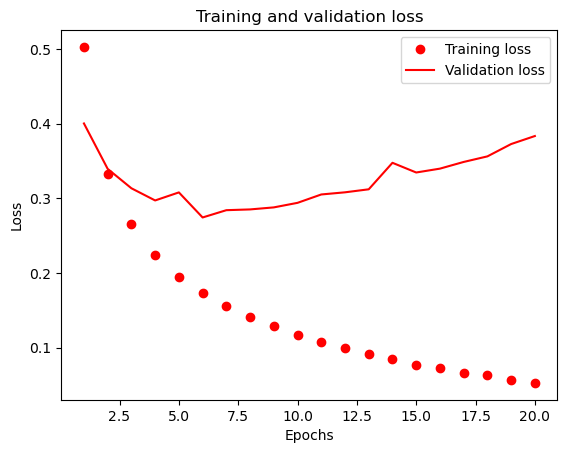

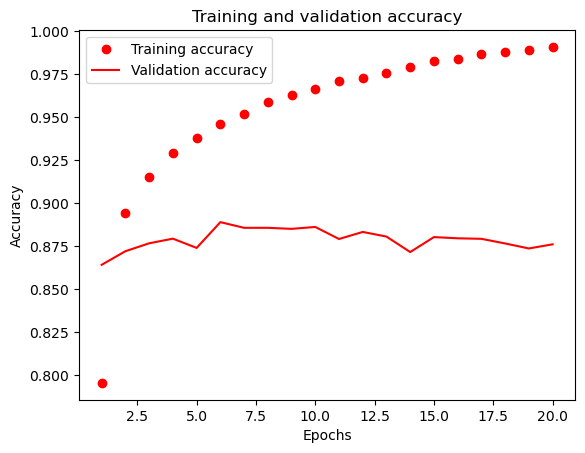

In [91]:
import matplotlib.pyplot as plot647
his_dict647 = his_layer647.history
l_value647 = his_dict647["loss"]
val_l_value647 = his_dict647["val_loss"]
epochs647 = range(1, len(l_value647) + 1)

#Plotting graph of Training and Validation loss
plot647.plot(epochs647, l_value647, "ro", label="Training loss")
plot647.plot(epochs647, val_l_value647, "r", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_647 = his_dict647["accuracy"]
val_accuracy_1 = his_dict647["val_accuracy"]
plot647.plot(epochs647, accuracy_647, "ro", label="Training accuracy")
plot647.plot(epochs647, val_accuracy_1, "r", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Creates a sequential model with one hidden layer (16 units, ReLU activation) and one output layer (1 unit, sigmoid activation). It is then assembled using the RMSprop optimizer and binary crossentropy loss, trained for 5 epochs with a batch size of 512, and tested on the test set.**

In [94]:
mod_647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

mod_647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
mod_647_layer.fit(p_train, q_train, epochs=5, batch_size=512)
res_647_layer = mod_647_layer.evaluate(p_test, q_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7434 - loss: 0.5629
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9002 - loss: 0.3068
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9214 - loss: 0.2398
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9337 - loss: 0.1994
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9405 - loss: 0.1800
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8830 - loss: 0.2890


In [96]:
print(res_647_layer)

[0.2858389914035797, 0.8850799798965454]


In [98]:
mod_647_layer.predict(p_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.2604035 ],
       [0.99995136],
       [0.9360224 ],
       ...,
       [0.14580335],
       [0.117737  ],
       [0.6443207 ]], dtype=float32)

**# Establishes a sequential model with three hidden layers (16 units each, ReLU activation) and one output layer (1 unit, sigmoid activation). The model is then assembled using binary crossentropy loss and RMSprop optimizer, the training data is divided into training and validation sets, and the model is trained for 20 epochs with a batch size of 512 while validating on the validation set.**

In [101]:
mod_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
mod_3_layers_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
p_val3_647 = p_train[:10000]
partial_p_train_647 = p_train[10000:]

q_val3_647 = q_train[:10000]
partial_q_train_647 = q_train[10000:]

his_3_layers_647 = mod_3_layers_647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val3_647, q_val3_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.6538 - loss: 0.6447 - val_accuracy: 0.8595 - val_loss: 0.4338
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8783 - loss: 0.3801 - val_accuracy: 0.8778 - val_loss: 0.3200
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9136 - loss: 0.2604 - val_accuracy: 0.8881 - val_loss: 0.2833
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9364 - loss: 0.1959 - val_accuracy: 0.8884 - val_loss: 0.2739
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9477 - loss: 0.1576 - val_accuracy: 0.8846 - val_loss: 0.2923
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9588 - loss: 0.1311 - val_accuracy: 0.8833 - val_loss: 0.2967
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9655 - loss: 0.1110 - val_accuracy: 0.8781 - val_loss: 0.3368
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9678 - loss: 0.0988 - val_accuracy: 0.8790 - v

In [103]:
his_dict_3_647 = his_3_layers_647.history
his_dict_3_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting graph of Training and Validation Accuracy**

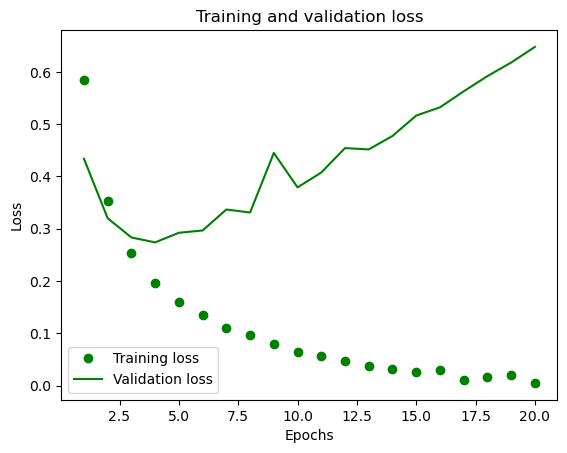

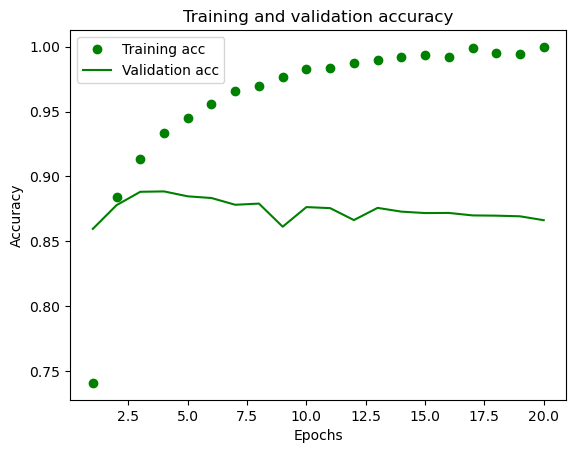

In [106]:
l_val647 = his_dict_3_647["loss"]
val_l_val3 = his_dict_3_647["val_loss"]
epochs3 = range(1, len(l_val647) + 1)
plot647.plot(epochs3, l_val647, "go", label="Training loss")
plot647.plot(epochs3, val_l_val3, "g", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_3 = his_dict_3_647["accuracy"]
val_accuracy_3 = his_dict_3_647["val_accuracy"]
plot647.plot(epochs3, accuracy_3, "go", label="Training acc")
plot647.plot(epochs3, val_accuracy_3, "g", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Builds a Sequential model with three hidden layers (16 units each, ReLU activation) and one output layer (1 unit, sigmoid activation). RMSprop optimizer and binary crossentropy loss are used to assemble the model. It is then trained for three epochs with a batch size of 512 before being assessed on the test set.**

In [109]:
mod_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


mod_3_layers_647.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

mod_3_layers_647.fit(p_train, q_train, epochs=3, batch_size=512)
res_3_layers = mod_3_layers_647.evaluate(p_test, q_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6952 - loss: 0.5810
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8984 - loss: 0.2861
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9243 - loss: 0.2097
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8853 - loss: 0.2880


In [111]:
print(res_647_layer)

[0.2858389914035797, 0.8850799798965454]


In [113]:
mod_647_layer.predict(p_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.2604035 ],
       [0.99995136],
       [0.9360224 ],
       ...,
       [0.14580335],
       [0.117737  ],
       [0.6443207 ]], dtype=float32)

**# Creates a sequential model with three hidden layers (16 units each, ReLU activation) and one output layer (1 unit, sigmoid activation). The model is then compiled using binary crossentropy loss and RMSprop optimizer, training data is divided into training and validation sets, and the model is trained for 20 epochs with a batch size of 512, validating on the validation set to ensure accuracy.**

In [116]:
mod_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
mod_3_layers_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
p_val3_647 = p_train[:10000]
partial_p_train_647 = p_train[10000:]

q_val3_647 = q_train[:10000]
partial_q_train_647 = q_train[10000:]

his_3_layers_647 = mod_3_layers_647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val3_647, q_val3_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6875 - loss: 0.6037 - val_accuracy: 0.8480 - val_loss: 0.4163
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8864 - loss: 0.3493 - val_accuracy: 0.8820 - val_loss: 0.3146
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9226 - loss: 0.2403 - val_accuracy: 0.8882 - val_loss: 0.2852
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9400 - loss: 0.1903 - val_accuracy: 0.8682 - val_loss: 0.3252
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9473 - loss: 0.1550 - val_accuracy: 0.8886 - val_loss: 0.2837
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9579 - loss: 0.1268 - val_accuracy: 0.8638 - val_loss: 0.3625
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9660 - loss: 0.1072 - val_accuracy: 0.8832 - val_loss: 0.3125
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9749 - loss: 0.0900 - val_accuracy: 0.8753 - v

In [118]:
his_dict_3_647 = his_3_layers_647.history
his_dict_3_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Validation and Accuracy Plots**

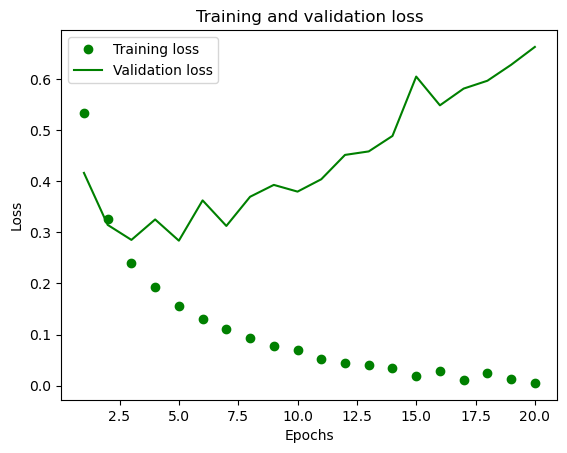

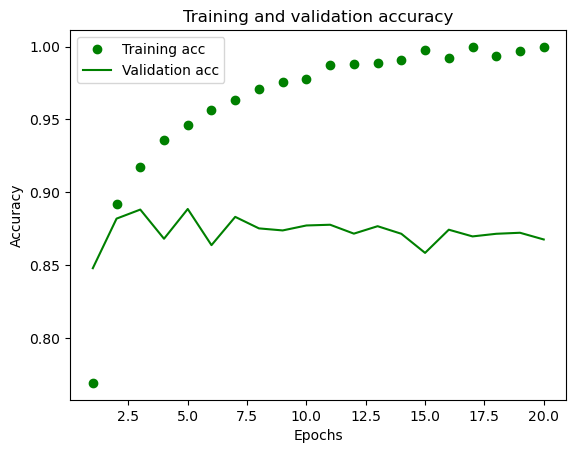

In [121]:
l_val647 = his_dict_3_647["loss"]
val_l_val3 = his_dict_3_647["val_loss"]
epochs3 = range(1, len(l_val647) + 1)
plot647.plot(epochs3, l_val647, "go", label="Training loss")
plot647.plot(epochs3, val_l_val3, "g", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_3 = his_dict_3_647["accuracy"]
val_accuracy_3 = his_dict_3_647["val_accuracy"]
plot647.plot(epochs3, accuracy_3, "go", label="Training acc")
plot647.plot(epochs3, val_accuracy_3, "g", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Makes a Sequential model with three hidden layers (16 units each, ReLU activation) and one output layer (1 unit, sigmoid activation). RMSprop optimizer and binary crossentropy loss are used to assemble it. The model is then trained for three epochs with a batch size of 512, then tested on the prescribed dataset.**

In [124]:
mod_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


mod_3_layers_647.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

mod_3_layers_647.fit(p_train, q_train, epochs=3, batch_size=512)
res_3_layers = mod_3_layers_647.evaluate(p_test, q_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7097 - loss: 0.5763
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8982 - loss: 0.2915
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9257 - loss: 0.2117
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8855 - loss: 0.2810


In [126]:
print(res_3_layers)

[0.2793980538845062, 0.8876000046730042]


In [128]:
mod_3_layers_647.predict(p_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.2308147 ],
       [0.99939954],
       [0.8477953 ],
       ...,
       [0.1112695 ],
       [0.09758514],
       [0.54881215]], dtype=float32)

**# Splits the training data into training and validation sets, defines a sequential model with three hidden layers (each with 32 units of ReLU activation) and an output layer (one unit of sigmoid activation). The model is then trained for 20 epochs with a batch size of 512 while validating on the validation set. The model is then compiled using the RMSprop optimizer and binary crossentropy loss..**

In [131]:
mod_32_units_647 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
mod_32_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
p_val_32_647 = p_train[:10000]
partial_p_train = p_train[10000:]

q_val_32_647 = q_train[:10000]
partial_q_train = q_train[10000:]


his_32_units_647 = mod_32_units_647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val_32_647, q_val_32_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.6621 - loss: 0.6225 - val_accuracy: 0.8596 - val_loss: 0.3928
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8774 - loss: 0.3478 - val_accuracy: 0.8345 - val_loss: 0.3810
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9153 - loss: 0.2380 - val_accuracy: 0.8801 - val_loss: 0.2986
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9348 - loss: 0.1832 - val_accuracy: 0.8726 - val_loss: 0.3196
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9531 - loss: 0.1474 - val_accuracy: 0.8658 - val_loss: 0.3557
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9587 - loss: 0.1246 - val_accuracy: 0.8779 - val_loss: 0.3224
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9697 - loss: 0.0975 - val_accuracy: 0.8804 - val_loss: 0.3322
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9746 - loss: 0.0827 - val_accuracy: 0.8702 - v

In [133]:
his_dict_32_647 = his_32_units_647.history
his_dict_32_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plots of Validation and Accuracy**

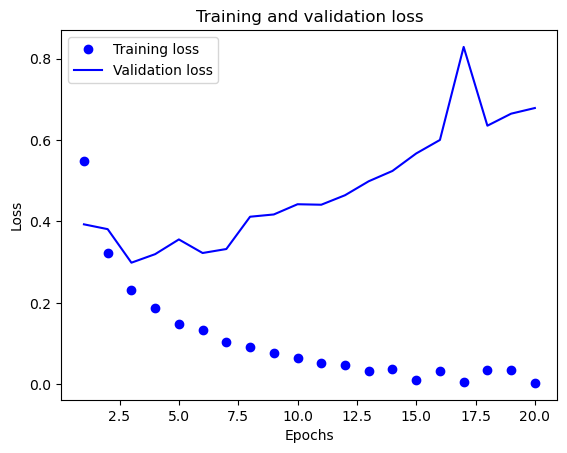

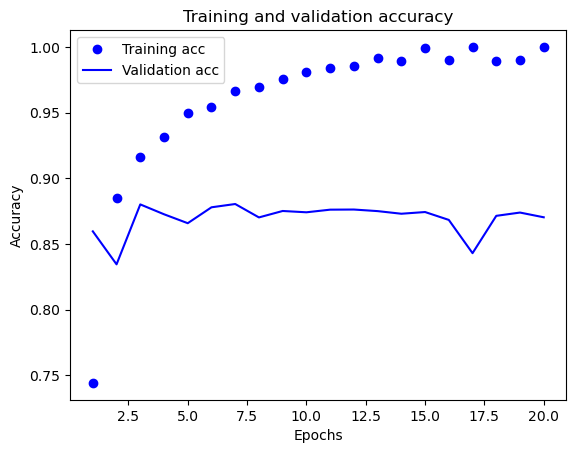

In [136]:
l_value_32_647 = his_dict_32_647["loss"]
val_l_value_32_647 = his_dict_32_647["val_loss"]
epochs_32 = range(1, len(l_value_32_647) + 1)
plot647.plot(epochs_32, l_value_32_647, "bo", label="Training loss")
plot647.plot(epochs_32, val_l_value_32_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy32 = his_dict_32_647["accuracy"]
val_accuracy32 = his_dict_32_647["val_accuracy"]
plot647.plot(epochs_32, accuracy32, "bo", label="Training acc")
plot647.plot(epochs_32, val_accuracy32, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [138]:
his_32_units_647 = mod_32_units_647.fit(p_train, q_train, epochs=3, batch_size=512)
res_32_units_647 = mod_32_units_647.evaluate(p_test, q_test)
res_32_units_647

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9405 - loss: 0.2751
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9619 - loss: 0.1245
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9761 - loss: 0.0821
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8622 - loss: 0.4220


[0.41508907079696655, 0.8648399710655212]

**# Divides the training data into training and validation sets, defines a sequential model with two hidden layers (64 units each, ReLU activation) and an output layer (1 unit, sigmoid activation), assembles it using RMSprop optimizer and binary crossentropy loss, trains the model for 20 epochs with a batch size of 512, and validates on the validation set.**

In [141]:
mod_64_units_647 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
mod_64_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
p_val_64_2 = p_train[:10000]
partial_p_train_64_2 = p_train[10000:]

q_val_64_2 = q_train[:10000]
partial_q_train_64_2 = q_train[10000:]

his_64_647 = mod_64_units_647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val_64_2, q_val_64_2))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.6893 - loss: 0.5893 - val_accuracy: 0.8743 - val_loss: 0.3396
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8848 - loss: 0.3074 - val_accuracy: 0.8625 - val_loss: 0.3287
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9112 - loss: 0.2273 - val_accuracy: 0.8827 - val_loss: 0.2855
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9385 - loss: 0.1726 - val_accuracy: 0.8854 - val_loss: 0.2837
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9492 - loss: 0.1393 - val_accuracy: 0.8806 - val_loss: 0.3163
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9643 - loss: 0.1099 - val_accuracy: 0.8766 - val_loss: 0.3212
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9718 - loss: 0.0890 - val_accuracy: 0.8600 - val_loss: 0.3912
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9744 - loss: 0.0768 - val_accuracy: 0.8662 - v

In [143]:
his_dict_64_647 = his_64_647.history
his_dict_64_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Assembles the model using binary crossentropy loss and RMSprop optimizer, divides the training data into training and validation sets, trains the model for 20 epochs with a batch size of 512, and validates on the validation set. This results in a sequential model with two hidden layers (64 units each, ReLU activation) and an output layer (1 unit, sigmoid activation).**

In [146]:
mod_64_units_647 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
mod_64_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
p_val_64_2 = p_train[:10000]
partial_p_train_64_2 = p_train[10000:]

q_val_64_2 = q_train[:10000]
partial_q_train_64_2 = q_train[10000:]

his_64_647 = mod_64_units_647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val_64_2, q_val_64_2))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6837 - loss: 0.5889 - val_accuracy: 0.8512 - val_loss: 0.3699
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8885 - loss: 0.3065 - val_accuracy: 0.8845 - val_loss: 0.2940
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9136 - loss: 0.2253 - val_accuracy: 0.8818 - val_loss: 0.2936
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9367 - loss: 0.1770 - val_accuracy: 0.8846 - val_loss: 0.2834
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9455 - loss: 0.1530 - val_accuracy: 0.8849 - val_loss: 0.2868
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9608 - loss: 0.1178 - val_accuracy: 0.8769 - val_loss: 0.3235
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9627 - loss: 0.1062 - val_accuracy: 0.8802 - val_loss: 0.3404
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9803 - loss: 0.0707 - val_accuracy: 0.8812 - v

In [148]:
his_dict_64_647 = his_64_647.history
his_dict_64_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plots of Validation Loss and Validation accuracy**

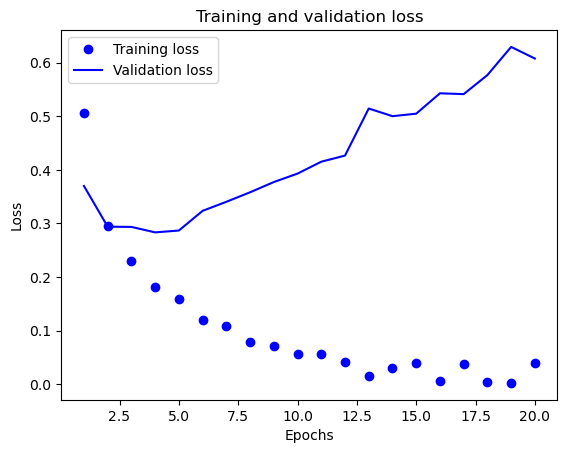

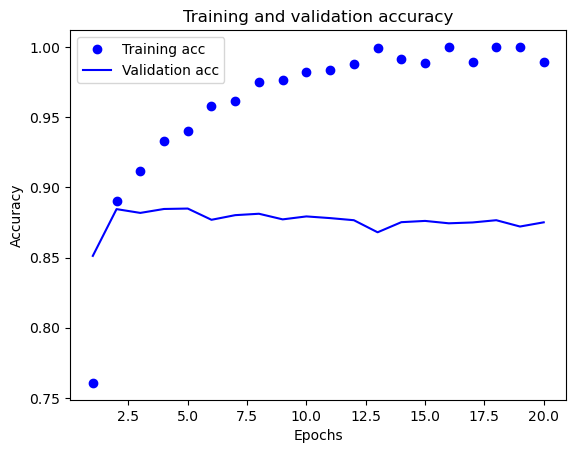

In [151]:
l_value64 = his_dict_64_647["loss"]
val_l_value64 = his_dict_64_647["val_loss"]
epochs_64 = range(1, len(l_value64) + 1)
plot647.plot(epochs_64, l_value64, "bo", label="Training loss")
plot647.plot(epochs_64, val_l_value64, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
accuracy64 = his_dict_64_647["accuracy"]
val_accuracy64 = his_dict_64_647["val_accuracy"]
plot647.plot(epochs_64, accuracy64, "bo", label="Training acc")
plot647.plot(epochs_64, val_accuracy64, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [153]:
his_64_647 = mod_64_units_647.fit(p_train, q_train, epochs=3, batch_size=512)
res_64_units_647 = mod_64_units_647.evaluate(p_test, q_test)
res_64_units_647

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9493 - loss: 0.1932
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9709 - loss: 0.0949
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9835 - loss: 0.0558
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8312 - loss: 0.5476


[0.5348324775695801, 0.8345999717712402]

In [155]:
mod_64_units_647.predict(p_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


array([[0.0570288 ],
       [0.99999905],
       [0.9789219 ],
       ...,
       [0.05320115],
       [0.04658524],
       [0.98710114]], dtype=float32)

**# Specifies a Sequential model with three hidden layers (128 units each, ReLU activation) and one output layer (1 unit, sigmoid activation). RMSprop optimizer and binary crossentropy loss are used to compile the model, which divides the training data into training and validation sets. The model is then trained for 20 epochs with a batch size of 512 while validity is checked on the validation set.**

In [158]:
mod_128units_647 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
mod_128units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
p_val_128_647 = p_train[:10000]
partial_p_train_647 = p_train[10000:]

q_val_128_647 = q_train[:10000]
partial_q_train_647 = q_train[10000:]

his_128_3 = mod_128units_647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val_128_647, q_val_128_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.6352 - loss: 0.6218 - val_accuracy: 0.8277 - val_loss: 0.4003
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8750 - loss: 0.3139 - val_accuracy: 0.7870 - val_loss: 0.4621
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9125 - loss: 0.2268 - val_accuracy: 0.8858 - val_loss: 0.2720
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9376 - loss: 0.1725 - val_accuracy: 0.8867 - val_loss: 0.2838
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9515 - loss: 0.1292 - val_accuracy: 0.8863 - val_loss: 0.2867
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9778 - loss: 0.0780 - val_accuracy: 0.8861 - val_loss: 0.3467
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9824 - loss: 0.0563 - val_accuracy: 0.8827 - val_loss: 0.4019
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9838 - loss: 0.0584 - val_accuracy: 0.88

In [160]:
his_dict_128_3 = his_128_3.history
his_dict_128_3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plots of Validation Loss and Validation Accuracy**

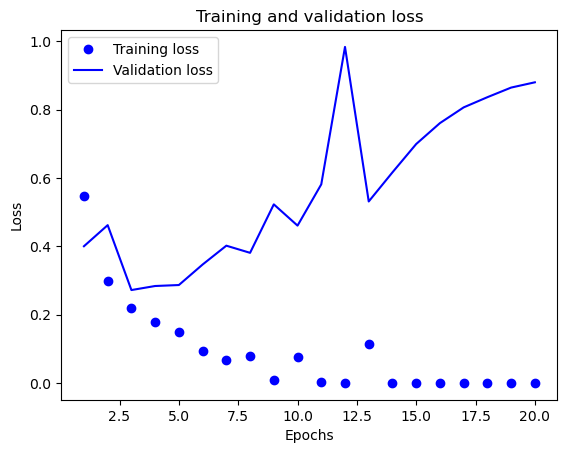

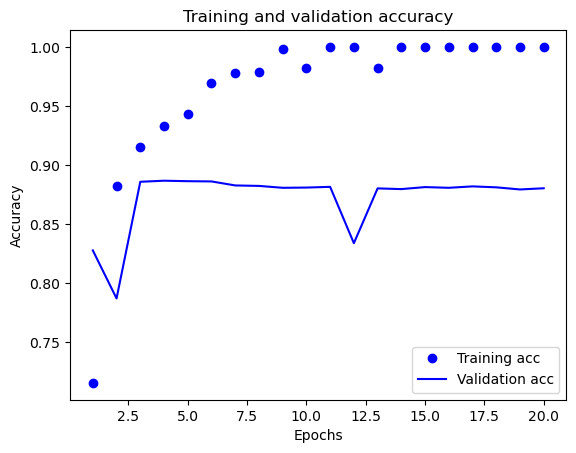

In [163]:
l_value128_3 = his_dict_128_3["loss"]
val_l_value128_3 = his_dict_128_3["val_loss"]
epochs_128 = range(1, len(l_value128_3) + 1)
plot647.plot(epochs_128, l_value128_3, "bo", label="Training loss")
plot647.plot(epochs_128, val_l_value128_3, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy128 = his_dict_128_3["accuracy"]
val_accuracy128 = his_dict_128_3["val_accuracy"]
plot647.plot(epochs_128, accuracy128, "bo", label="Training acc")
plot647.plot(epochs_128, val_accuracy128, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [165]:
his_128_3 = mod_128units_647.fit(p_train, q_train, epochs=2, batch_size=512)
res_128_units_3 = mod_128units_647.evaluate(p_test, q_test)
res_128_units_3

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9272 - loss: 0.3628
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9704 - loss: 0.0895
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8700 - loss: 0.3721


[0.36694765090942383, 0.8722800016403198]

In [167]:
mod_128units_647.predict(p_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


array([[0.0074477 ],
       [0.9999998 ],
       [0.84009445],
       ...,
       [0.00986737],
       [0.00405049],
       [0.9016265 ]], dtype=float32)

**MSE Loss Function model with 16 units and 3-layers**

In [170]:
MSE_Mod_16_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation of model
MSE_Mod_16_647.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation of model
p_val_MSE_16 = p_train[:10000]
partial_p_train_16 = p_train[10000:]

q_val_MSE_16 = q_train[:10000]
partial_q_train_16 = q_train[10000:]
# Model Fit

his_MSE_647 = MSE_Mod_16_647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val_MSE_16, q_val_MSE_16))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.6823 - loss: 0.2169 - val_accuracy: 0.8669 - val_loss: 0.1255
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8865 - loss: 0.1074 - val_accuracy: 0.8617 - val_loss: 0.1068
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9120 - loss: 0.0764 - val_accuracy: 0.8888 - val_loss: 0.0854
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9360 - loss: 0.0563 - val_accuracy: 0.8808 - val_loss: 0.0873
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9474 - loss: 0.0479 - val_accuracy: 0.8805 - val_loss: 0.0891
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9533 - loss: 0.0413 - val_accuracy: 0.8756 - val_loss: 0.0894
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9655 - loss: 0.0333 - val_accuracy: 0.8625 - val_loss: 0.1054
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9637 - loss: 0.0336 - val_accuracy: 0.8673 - v

In [173]:
hisdict_MSE_647 = his_MSE_647.history
hisdict_MSE_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

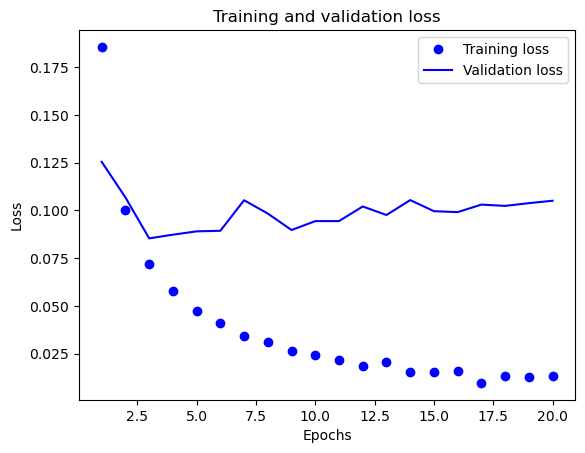

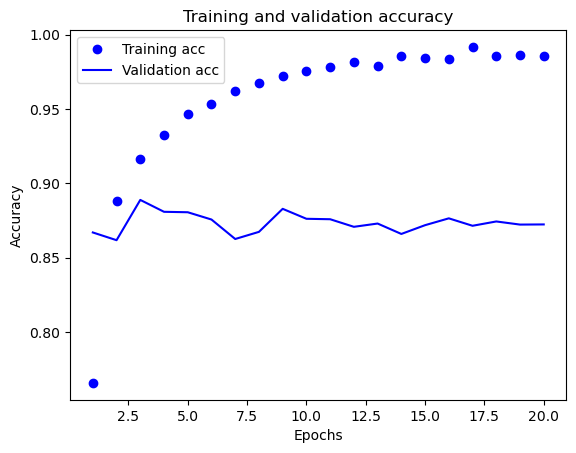

In [175]:
import matplotlib.pyplot as plot647
l_value_MSE_16_3 = hisdict_MSE_647["loss"]
val_l_value_MSE_16_3 = hisdict_MSE_647["val_loss"]
epochs_MSE = range(1, len(l_value_MSE_16_3) + 1)
plot647.plot(epochs_MSE, l_value_MSE_16_3, "bo", label="Training loss")
plot647.plot(epochs_MSE, val_l_value_MSE_16_3, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_MSE = hisdict_MSE_647["accuracy"]
val_accuracy_MSE = hisdict_MSE_647["val_accuracy"]
plot647.plot(epochs_MSE, accuracy_MSE, "bo", label="Training acc")
plot647.plot(epochs_MSE, val_accuracy_MSE, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [177]:
MSE_Mod_16_647.fit(p_train, q_train, epochs=8, batch_size=512)
res_MSE_647 = MSE_Mod_16_647.evaluate(p_test, q_test)
res_MSE_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9428 - loss: 0.0493
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9558 - loss: 0.0389
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9636 - loss: 0.0330
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9677 - loss: 0.0291
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9713 - loss: 0.0269
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9753 - loss: 0.0238
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9712 - loss: 0.0266
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9768 - loss: 0.0224
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8627 - loss: 0.1164


[0.11508188396692276, 0.8638799786567688]

In [179]:
MSE_Mod_16_647.predict(p_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.01490034],
       [0.99999917],
       [0.40188745],
       ...,
       [0.01354666],
       [0.00618635],
       [0.2595521 ]], dtype=float32)

**# The training data is divided into training and validation sets, and the model is trained for 20 epochs with a batch size of 512 while validating on the validation set. The model is then created with 1 hidden layer (16 units, tanh activation) and 1 output layer (1 unit, sigmoid activation). It is then compiled using the RMSprop optimizer and mean squared error loss.**

In [182]:
tanh647 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

tanh647.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

p_val_tanh = p_train[:10000]
partial_p_train = p_train[10000:]

q_val_tanh = q_train[:10000]
partial_q_train = q_train[10000:]


histanh_model = tanh647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val_tanh, q_val_tanh))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6920 - loss: 0.2011 - val_accuracy: 0.8528 - val_loss: 0.1301
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8912 - loss: 0.1086 - val_accuracy: 0.8794 - val_loss: 0.1019
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9172 - loss: 0.0823 - val_accuracy: 0.8869 - val_loss: 0.0921
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9349 - loss: 0.0667 - val_accuracy: 0.8887 - val_loss: 0.0870
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9377 - loss: 0.0598 - val_accuracy: 0.8800 - val_loss: 0.0896
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9427 - loss: 0.0546 - val_accuracy: 0.8879 - val_loss: 0.0837
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9516 - loss: 0.0477 - val_accuracy: 0.8868 - val_loss: 0.0835
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9596 - loss: 0.0426 - val_accuracy: 0.8861 - v

In [184]:
hisdict_tanh_647 = histanh_model.history
hisdict_tanh_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plots of Training and Validation Loss and Training and Validation accuracy**

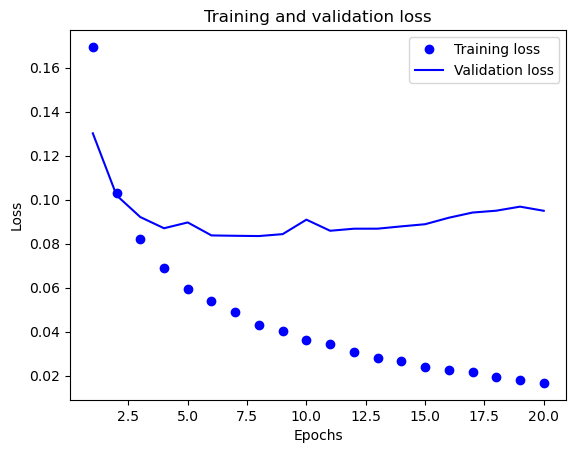

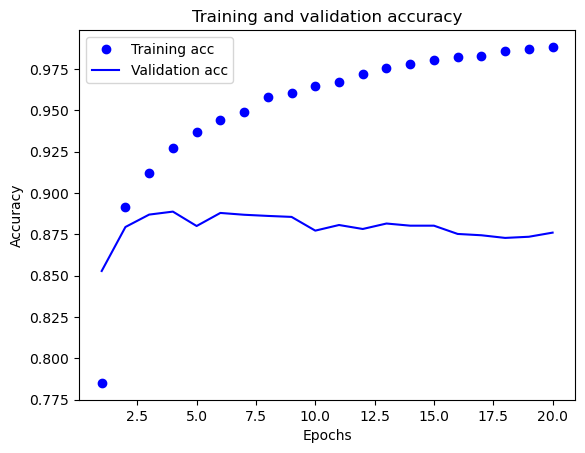

In [187]:
l_value_tanh_647= hisdict_tanh_647["loss"]
val_l_value_tanh_647 = hisdict_tanh_647["val_loss"]
epochs_tanh = range(1, len(l_value_tanh_647) + 1)
plot647.plot(epochs_tanh, l_value_tanh_647, "bo", label="Training loss")
plot647.plot(epochs_tanh, val_l_value_tanh_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
accuracy_tanh = hisdict_tanh_647["accuracy"]
val_accuracy_tanh = hisdict_tanh_647["val_accuracy"]
plot647.plot(epochs_tanh, accuracy_tanh, "bo", label="Training acc")
plot647.plot(epochs_tanh, val_accuracy_tanh, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [189]:
tanh647.fit(p_train, q_train, epochs=8, batch_size=512)
res_tanh_647 = tanh647.evaluate(p_test, q_test)
res_tanh_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9424 - loss: 0.0479
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9551 - loss: 0.0400
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9596 - loss: 0.0366
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9666 - loss: 0.0318
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9710 - loss: 0.0289
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9715 - loss: 0.0283
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9748 - loss: 0.0261
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9771 - loss: 0.0242
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8636 - loss: 0.1070


[0.10472045838832855, 0.8671600222587585]

**Adam Operator with 16 units and 3-layers**

In [192]:
adam647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

adam647.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

p_adam_647 = p_train[:10000]
partial_p_train_16 = p_train[10000:]

q_adam_647 = q_train[:10000]
partial_q_train_16 = q_train[10000:]


hisadam_647 = adam647.fit(partial_p_train_16,
                    partial_q_train_16,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_adam_647, q_adam_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.6328 - loss: 0.6533 - val_accuracy: 0.8468 - val_loss: 0.4739
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8847 - loss: 0.3905 - val_accuracy: 0.8835 - val_loss: 0.3083
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9330 - loss: 0.2187 - val_accuracy: 0.8897 - val_loss: 0.2766
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9507 - loss: 0.1560 - val_accuracy: 0.8864 - val_loss: 0.2878
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9710 - loss: 0.1059 - val_accuracy: 0.8826 - val_loss: 0.3082
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9800 - loss: 0.0772 - val_accuracy: 0.8794 - val_loss: 0.3447
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9881 - loss: 0.0560 - val_accuracy: 0.8760 - val_loss: 0.3880
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9941 - loss: 0.0362 - val_accuracy: 0.8748 - v

In [194]:
hisdict_adam_647 = hisadam_647.history
hisdict_adam_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plots of Validation Loss and Validation Accuracy**

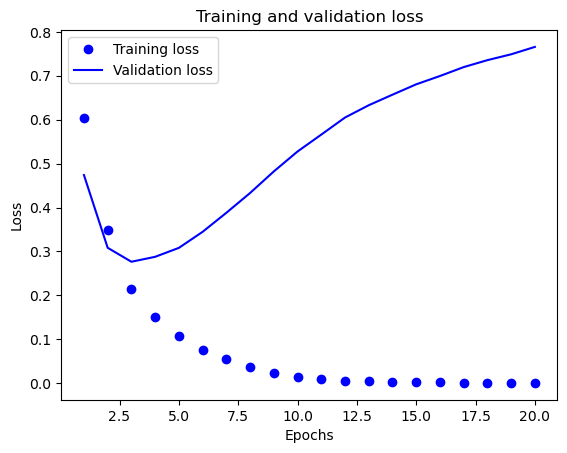

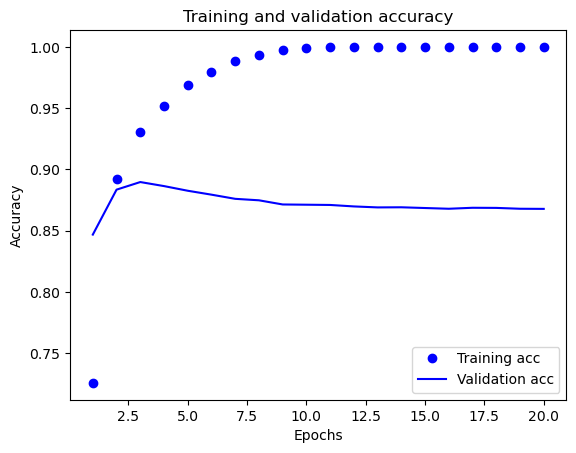

In [197]:
l_value_adam_647 = hisdict_adam_647["loss"]
val_l_value_adam_647 = hisdict_adam_647["val_loss"]
epochs_adam = range(1, len(l_value_adam_647) + 1)
plot647.plot(epochs_adam, l_value_adam_647, "bo", label="Training loss")
plot647.plot(epochs_adam, val_l_value_adam_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_adam = hisdict_adam_647["accuracy"]
val_accuracy_adam = hisdict_adam_647["val_accuracy"]
plot647.plot(epochs_adam, accuracy_adam, "bo", label="Training acc")
plot647.plot(epochs_adam, val_accuracy_adam, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [199]:
adam647.fit(p_train, q_train, epochs=4, batch_size=512)
res_adam = adam647.evaluate(p_test, q_test)
res_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9410 - loss: 0.2861
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9683 - loss: 0.1027
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9863 - loss: 0.0623
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9920 - loss: 0.0391
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8565 - loss: 0.5734


[0.5665340423583984, 0.8580399751663208]

**Regularization model with 16 units and 2-layers**

In [206]:
from tensorflow.keras import regularizers
regul647 = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
regul647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

his_regularization647 = regul647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val, q_val))
hisdict_regularization647 = his_regularization647.history
hisdict_regularization647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6880 - loss: 0.6616 - val_accuracy: 0.8614 - val_loss: 0.4663
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8819 - loss: 0.4206 - val_accuracy: 0.8768 - val_loss: 0.3758
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9156 - loss: 0.3165 - val_accuracy: 0.8877 - val_loss: 0.3423
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9255 - loss: 0.2727 - val_accuracy: 0.8699 - val_loss: 0.3620
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9340 - loss: 0.2473 - val_accuracy: 0.8886 - val_loss: 0.3294
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9466 - loss: 0.2243 - val_accuracy: 0.8834 - val_loss: 0.3427
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9537 - loss: 0.2043 - val_accuracy: 0.8793 - val_loss: 0.3597
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9579 - loss: 0.1887 - val_accuracy: 0.8836 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plots of Validation loss and Validation accuracy**

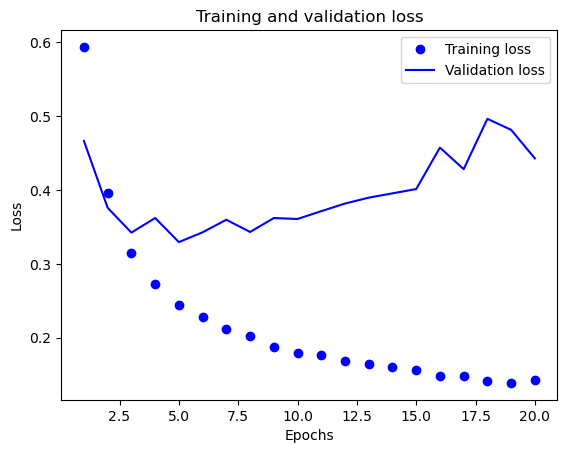

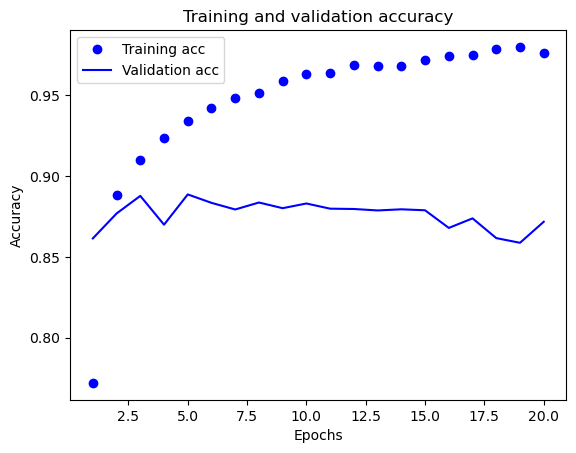

In [209]:
l_valu_647 = hisdict_regularization647["loss"]
val_l_value_r_647 = hisdict_regularization647["val_loss"]
epochs_r = range(1, len(l_valu_647) + 1)
plot647.plot(epochs_r, l_valu_647, "bo", label="Training loss")
plot647.plot(epochs_r, val_l_value_r_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
acc_regul = hisdict_regularization647["accuracy"]
val_acc_regul = hisdict_regularization647["val_accuracy"]
plot647.plot(epochs_r, acc_regul, "bo", label="Training acc")
plot647.plot(epochs_r, val_acc_regul, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [211]:
regul647.fit(p_train, q_train, epochs=8, batch_size=512)
res_regularization_647 = regul647.evaluate(p_test, q_test)
res_regularization_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9383 - loss: 0.2501
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9503 - loss: 0.2035
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9541 - loss: 0.1911
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9588 - loss: 0.1798
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9609 - loss: 0.1722
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9593 - loss: 0.1761
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9680 - loss: 0.1612
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9653 - loss: 0.1636
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8450 - loss: 0.5051


[0.5047319531440735, 0.8452399969100952]

**Dropout function with 16 units and 3-layers**

In [214]:
from tensorflow.keras import regularizers
Drpt647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Drpt647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

his_Dropout_647 = Drpt647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val, q_val))
hisdict_Dropout_647 = his_Dropout_647.history
hisdict_Dropout_647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.5383 - loss: 0.6903 - val_accuracy: 0.6023 - val_loss: 0.6299
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7065 - loss: 0.6237 - val_accuracy: 0.8087 - val_loss: 0.5540
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8026 - loss: 0.5613 - val_accuracy: 0.8241 - val_loss: 0.4987
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8580 - loss: 0.5028 - val_accuracy: 0.8379 - val_loss: 0.4681
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8726 - loss: 0.4665 - val_accuracy: 0.8650 - val_loss: 0.4425
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8915 - loss: 0.4187 - val_accuracy: 0.8694 - val_loss: 0.4298
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9106 - loss: 0.3881 - val_accuracy: 0.8639 - val_loss: 0.4227
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9185 - loss: 0.3584 - val_accuracy: 0.8685 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plots of Validation Loss and Validation Accuracy**

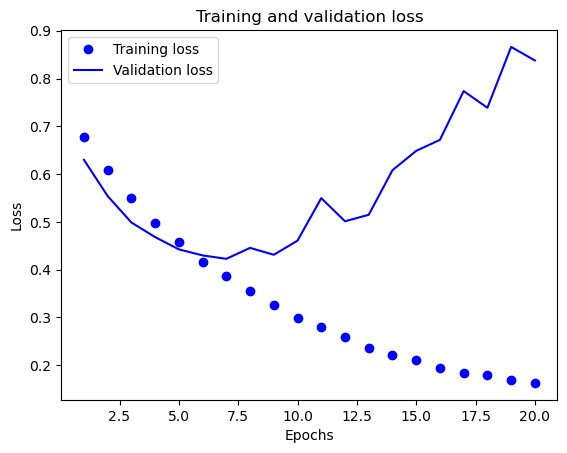

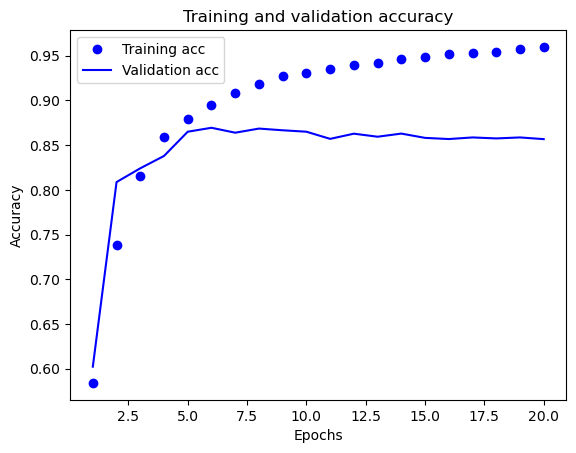

In [217]:
l_val_647 = hisdict_Dropout_647["loss"]
val_l_val_d_647 = hisdict_Dropout_647["val_loss"]
epochs_d = range(1, len(l_val_647) + 1)
plot647.plot(epochs_d, l_val_647, "bo", label="Training loss")
plot647.plot(epochs_d, val_l_val_d_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_drpt = hisdict_Dropout_647["accuracy"]
val_acc_drpt = hisdict_Dropout_647["val_accuracy"]
plot647.plot(epochs_d, acc_drpt, "bo", label="Training acc")
plot647.plot(epochs_d, val_acc_drpt, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [219]:
Drpt647.fit(p_train, q_train, epochs=8, batch_size=512)
res_Dropout647 = Drpt647.evaluate(p_test, q_test)
res_Dropout647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9010 - loss: 0.3876
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9091 - loss: 0.3266
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9233 - loss: 0.2755
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9245 - loss: 0.2507
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9298 - loss: 0.2437
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9299 - loss: 0.2360
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9345 - loss: 0.2182
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9388 - loss: 0.2059
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8594 - loss: 0.5893


[0.5623276233673096, 0.8614000082015991]

**Training model with hyper tuned parameters with 32 units and 3 -layers**

In [222]:
from tensorflow.keras import regularizers
Hyp647 = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Hyp647.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

his_Hyper647 = Hyp647.fit(partial_p_train,
                    partial_q_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(p_val, q_val))
his_dictHyper647 = his_Hyper647.history
his_dictHyper647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.5387 - loss: 0.2577 - val_accuracy: 0.8198 - val_loss: 0.2224
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6774 - loss: 0.2232 - val_accuracy: 0.8519 - val_loss: 0.1581
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7727 - loss: 0.1807 - val_accuracy: 0.8752 - val_loss: 0.1211
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8403 - loss: 0.1481 - val_accuracy: 0.8827 - val_loss: 0.1048
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8820 - loss: 0.1219 - val_accuracy: 0.8728 - val_loss: 0.1039
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8998 - loss: 0.1062 - val_accuracy: 0.8886 - val_loss: 0.0988
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9206 - loss: 0.0921 - val_accuracy: 0.8819 - val_loss: 0.0988
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9327 - loss: 0.0820 - val_accuracy: 0.8820 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plots of Validation Loss and Validation Accuracy**

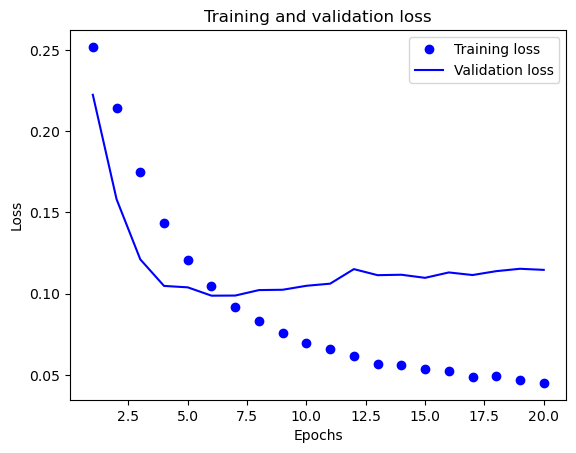

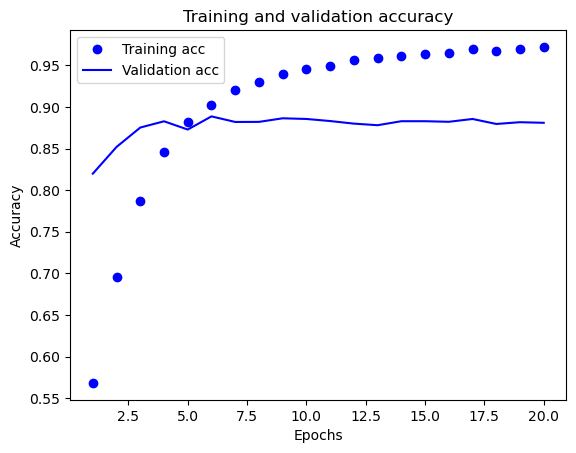

In [225]:
l_va_hyp_647 = his_dictHyper647["loss"]
val_l_va_hyp_647 = his_dictHyper647["val_loss"]
epochs_h = range(1, len(l_va_hyp_647) + 1)
plot647.plot(epochs_h, l_va_hyp_647, "bo", label="Training loss")
plot647.plot(epochs_h, val_l_va_hyp_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_hyp = his_dictHyper647["accuracy"]
val_acc_hyp = his_dictHyper647["val_accuracy"]
plot647.plot(epochs_h, acc_hyp, "bo", label="Training acc")
plot647.plot(epochs_h, val_acc_hyp, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [227]:
Hyp647.fit(p_train, q_train, epochs=8, batch_size=512)
res_Hyper647 = Hyp647.evaluate(p_test, q_test)
res_Hyper647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9262 - loss: 0.0826
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9403 - loss: 0.0691
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9445 - loss: 0.0649
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9509 - loss: 0.0601
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9532 - loss: 0.0570
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9581 - loss: 0.0531
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9576 - loss: 0.0533
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9584 - loss: 0.0525
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8705 - loss: 0.1188


[0.11668931692838669, 0.8737599849700928]

**Make a scatter plot with the accuracy against the loss for several models, name the model points, and add labels to the axes and plot title.**

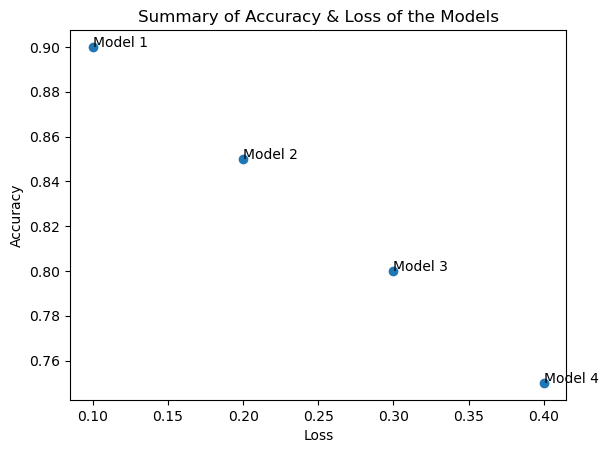

In [230]:
Mod_Loss = [0.1, 0.2, 0.3, 0.4]  # Example loss values
Mod_Accuracy = [0.9, 0.85, 0.8, 0.75]  # Example accuracy values
Labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']  # Labels for each point

fig, axis = plot647.subplots()
axis.scatter(Mod_Loss, Mod_Accuracy)
for i, txt in enumerate(Labels):
    axis.annotate(txt, (Mod_Loss[i], Mod_Accuracy[i]))
plot647.title("Summary of Accuracy & Loss of the Models")
plot647.ylabel("Accuracy")
plot647.xlabel("Loss")

plot647.show()

**Description**

A basic neural network with a single hidden layer of 16 units was constructed using binary cross-entropy loss and ReLU activation after the data was imported and the analysis parameters were changed. By adjusting the number of hidden layers (from one to three) and units per layer (32, 64, and 128), more experiments were carried out to enhance the performance of the model. Accuracy was generally increased when the number of concealed units was increased, although overfitting became a possibility as well.Moreover, no discernible improvement in performance was observed when mean squared error (MSE) was substituted for binary cross-entropy. Taken together, the results showed that although fine-tuning the model's architecture and parameters might improve accuracy, choosing loss functions and controlling overfitting need careful thought.